In [1]:
#we will go through the different variables calculated and find how strongly correlated they are to the outcome of games
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
thirdConv_df = pd.read_csv("/Users/kyle/Desktop/NFLModel/data/3DConvCorrTest.csv")

In [4]:
thirdConv_df.head()

,HomeTeam,AwayTeam,3DConvAvg,3DConv75,3DConv66,Outcome
0,Arizona Cardinals,Green Bay Packers,7.80,7.850,7.834,-3
1,New York Jets,Cincinnati Bengals,-13.05,-11.275,-11.843,3
2,Indianapolis Colts,Tennessee Titans,2.10,2.000,2.032,-3
3,Houston Texans,Los Angeles Rams,-17.95,-21.975,-20.687,-16
4,Cleveland Browns,Pittsburgh Steelers,3.95,5.275,4.851,-5


In [5]:
thirdConv_df.describe()

,3DConvAvg,3DConv75,3DConv66,Outcome
count,58.000000,58.000000,58.000000,58.000000
mean,-0.680172,-0.465948,-0.534500,-1.793103
std,9.250699,9.632004,9.448831,15.691945
min,-23.600000,-22.750000,-22.478000,-38.000000
25%,-6.575000,-6.762500,-6.703000,-11.750000
50%,-0.125000,1.625000,1.606000,-2.500000
75%,5.800000,6.356250,6.245000,7.000000
max,21.150000,21.325000,21.269000,40.000000


<AxesSubplot:xlabel='3DConvAvg', ylabel='Outcome'>

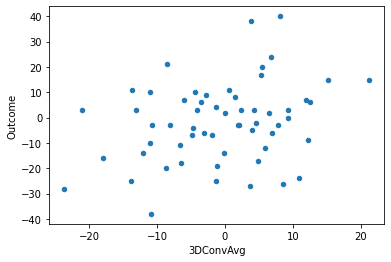

In [9]:
thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome')

In [10]:
x = thirdConv_df['3DConvAvg']
y = thirdConv_df['Outcome']
fit = np.polyfit(x, y, deg=1)
fit

array([ 0.5008943 , -1.45240896])

<function matplotlib.pyplot.show(close=None, block=None)>

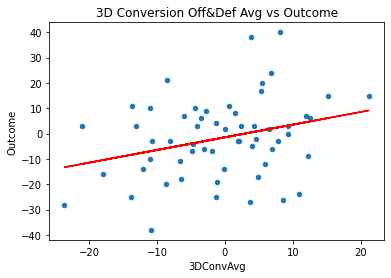

In [11]:
thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome')
plt.title('3D Conversion Off&Def Avg vs Outcome')

plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show

In [12]:
from scipy import stats
stats.pearsonr(thirdConv_df['3DConvAvg'], thirdConv_df['Outcome'])

(0.2952866823957224, 0.02442868775996243)

'Outcome = 0.501 * Year + -1.452'

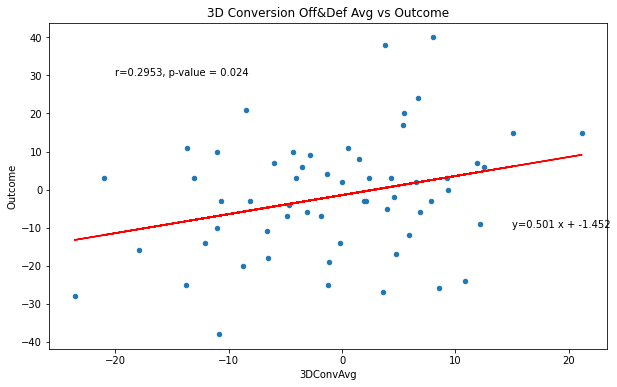

In [23]:
thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome', figsize=(10, 6))
plt.title('3D Conversion Off&Def Avg vs Outcome')

plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(15, -10))
pears = stats.pearsonr(thirdConv_df['3DConvAvg'], thirdConv_df['Outcome'])
plt.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))
plt.show
'Outcome = {0:.3f} * Year + {1:.3f}'.format(fit[0], fit[1]) 


<function matplotlib.pyplot.show(close=None, block=None)>

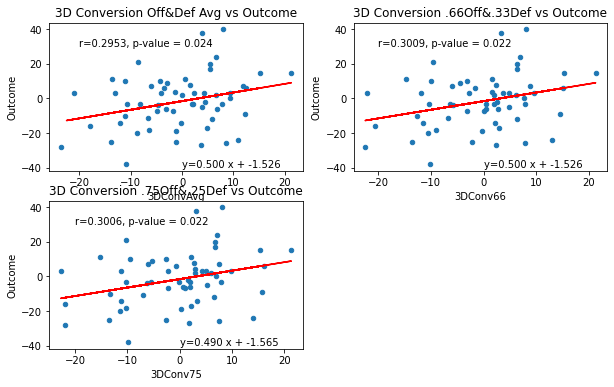

In [29]:
fig = plt.figure()

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome', figsize=(10, 6), ax=ax0)
ax0.set_title('3D Conversion Off&Def Avg vs Outcome')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(thirdConv_df['3DConvAvg'], thirdConv_df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))

thirdConv_df.plot(kind='scatter', x='3DConv66', y='Outcome', figsize=(10, 6), ax=ax1)
x = thirdConv_df['3DConv66']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('3D Conversion .66Off&.33Def vs Outcome')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(thirdConv_df['3DConv66'], thirdConv_df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))

thirdConv_df.plot(kind='scatter', x='3DConv75', y='Outcome', figsize=(10, 6), ax=ax2)
x = thirdConv_df['3DConv75']
fit = np.polyfit(x, y, deg=1)
ax2.set_title('3D Conversion .75Off&.25Def vs Outcome')
ax2.plot(x, fit[0] * x + fit[1], color='red')
ax2.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(thirdConv_df['3DConv75'], thirdConv_df['Outcome'])
ax2.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))

plt.show



In [30]:
#when taking into account the r, p, and corr values: .66off & .33def weighted average is the best predictor
#since it has max(r), min(p), max(corr)